# Credit Card Fraud Detection

> ### Introduction
This dataset presents transactions that occurred in two days and the dataset is highly unbalanced, where we only have 492 frauds out of 284807 transactions. 
The resources only contains the numerical varaibles which are the result of PCA transformation due to confidential concern. 

> ### Goal

*   Dealing with imbalanced dataset( SMOTE and Weight)
*   Model Prediction and Selection 
*   Feature Importance Selection 

>### Outline

*   Data Preprocessing - Robust Scaler, Data Split
*   Random Forest Prediction wihtout any Tuning
*   Random Forest + SMOTE
*   Random Forest + Class_Weight
*   XGboost + SMOTE 
*   XGboost + scale_pos_weight 
*   XGboost + scale_pos_weight + Feature Selection
*   XGboost + scale_pos_weight + Feature Selection + Cross Validation
*   XGboost + SMOTE + Feature Selection 
*   XGboost + SMOTE + Feature Selection + Cross Validation

> ### Evaluate Method
Accuracy is not a good indicator and meaningful for highly imbalanced data.
It's more appropriate to use precision and recall to eveluate the model instead of accuracy when the dataset is skewed.











In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
df_raw=pd.read_csv('creditcard.csv')

In [3]:
df_raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


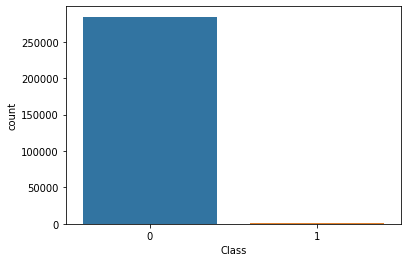

In [4]:
sns.countplot(x='Class',data=df_raw)

# *Data Preprocessing*

In [19]:
X=df_raw.iloc[:,:-1]
y=df_raw['Class']

In [20]:
scaler=RobustScaler()
X_scaler=scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=42)

# *Random Forest*

In [15]:
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_score = RF_clf.predict(X_test)

In [16]:
#Compute the average precision score

average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.74


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.74')

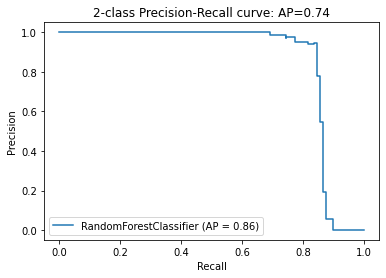

In [18]:
#Plot the Precision-Recall curve

disp = plot_precision_recall_curve(RF_clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

## 1.Random Forest + SMOTE

In [9]:
from collections import Counter
print(Counter(y))

Counter({0: 284315, 1: 492})


In [6]:
from imblearn.over_sampling import SMOTE

smo = SMOTE(random_state=42)
X_smo_train, y_smo_train = smo.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(Counter(y_smo_train))

In [11]:
RF_clf = RandomForestClassifier()
RF_clf.fit(X_smo_train, y_smo_train)
smo_pred_prob = RF_clf.predict_proba(X_test)[:,1]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
smo_average_precision = average_precision_score(y_test, smo_pred_prob)

print('Average precision-recall score: {0:0.2f}'.format(
      smo_average_precision))

Average precision-recall score: 0.89


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.887')

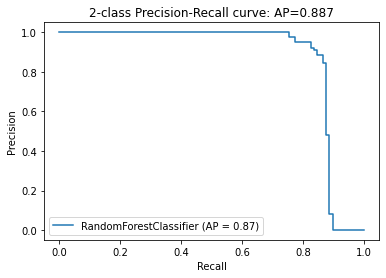

In [51]:
disp_smo = plot_precision_recall_curve(RF_clf, X_test, y_test)
disp_smo.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.3f}'.format(smo_average_precision))

Text(0.5, 1.0, 'PR Curve : AP=0.89')

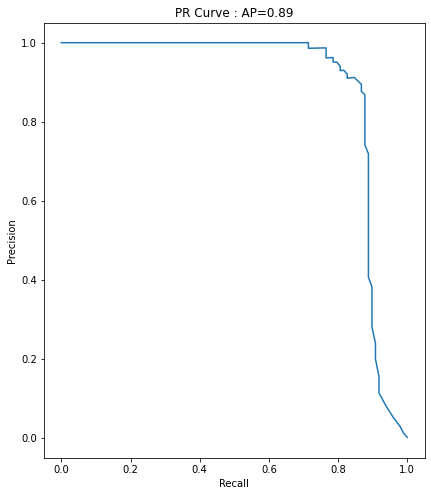

In [32]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')


RF_clf = RandomForestClassifier()
RF_clf.fit(X_smo_train, y_smo_train)
smo_pred_prob = RF_clf.predict_proba(X_test)[:,1]

p,r,_ = precision_recall_curve(y_test,smo_pred_prob)
tpr,fpr,_ = roc_curve(y_test,smo_pred_prob)

ax1.plot(r,p,label=w)
ax1.set_title('PR Curve : AP={0:0.2f}'.format(average_precision_score(y_test, smo_pred_prob)))



Random Forest + SMOTE :

Avg Precision is 0.89

## 2.Random Forest + Class Weight

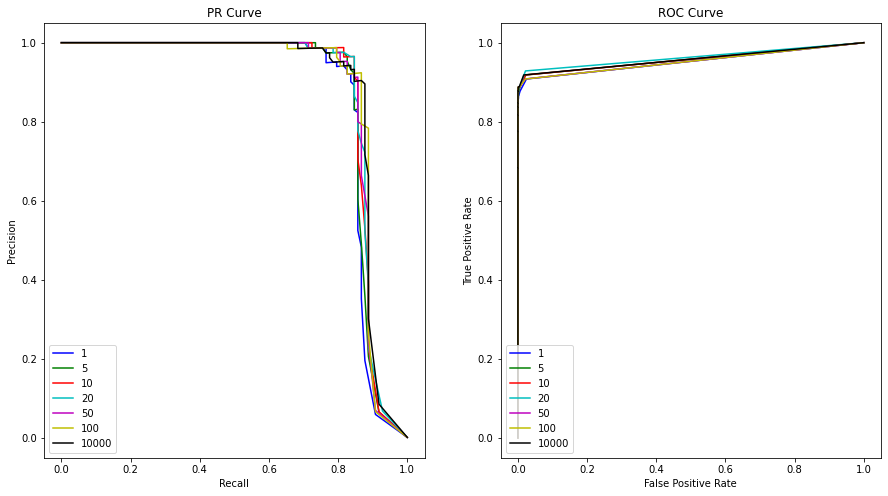

In [28]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

for w,k in zip([1,5,10,20,50,100,10000],'bgrcmykw'):
    RF_clf = RandomForestClassifier(class_weight={0:1,1:w})
    RF_clf.fit(X_train,y_train)
    pred_prob = RF_clf.predict_proba(X_test)[:,1]

    p,r,_ = precision_recall_curve(y_test,pred_prob)
    tpr,fpr,_ = roc_curve(y_test,pred_prob)
    
    ax1.plot(r,p,c=k,label=w)
    ax2.plot(tpr,fpr,c=k,label=w)
ax1.legend(loc='lower left')    
ax2.legend(loc='lower left')

plt.show()

In [40]:
for w in ([1,5,10,20,50,100,10000]):
    RF_clf = RandomForestClassifier(class_weight={0:1,1:w})
    RF_clf.fit(X_train,y_train)
    pred_prob = RF_clf.predict_proba(X_test)[:,1]
    print('Weight:',w,'AP={0:0.2f}'.format(average_precision_score(y_test, pred_prob)))

Weight: 1 AP=0.87
Weight: 5 AP=0.86
Weight: 10 AP=0.87
Weight: 20 AP=0.87
Weight: 50 AP=0.88
Weight: 100 AP=0.88
Weight: 10000 AP=0.87


Random Forest + Class_Weight :

The best AP is 0.88 when weight= 50 or 100

# *XGboost*

## 1. XGboost + SMOTE

In [42]:
xgb_params = {
    'max_depth': 10,
    'learning_rate': 0.05,
    'n_estimators': 1000,
    'subsample': .75,
    'colsample_bytree': 0.7,
    'objective': 'binary:logistic',
    'silent': True,
    'nthread': -1,
    'gamma': 1,
    'min_child_weight': 1,
    'max_delta_step': 0,
    'subsample': 0.85,
    'colsample_bytree': 0.7,
    'colsample_bylevel': 1,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'missing': None,
    'seed': 1
}

In [44]:
xgb_clf=xgb.XGBClassifier(**xgb_params)
xgb_clf.fit(X_smo_train,y_smo_train,
              verbose=1, 
              eval_set=[(X_test, y_test)],
              early_stopping_rounds=150)
y_pred=xgb_clf.predict_proba(X_test)

[0]	validation_0-error:0.017731
Will train until validation_0-error hasn't improved in 150 rounds.
[1]	validation_0-error:0.005495
[2]	validation_0-error:0.004108
[3]	validation_0-error:0.003406
[4]	validation_0-error:0.002668
[5]	validation_0-error:0.002212
[6]	validation_0-error:0.002072
[7]	validation_0-error:0.001843
[8]	validation_0-error:0.001791
[9]	validation_0-error:0.001668
[10]	validation_0-error:0.00165
[11]	validation_0-error:0.001685
[12]	validation_0-error:0.00151
[13]	validation_0-error:0.001545
[14]	validation_0-error:0.001633
[15]	validation_0-error:0.001545
[16]	validation_0-error:0.001562
[17]	validation_0-error:0.001598
[18]	validation_0-error:0.001685
[19]	validation_0-error:0.00172
[20]	validation_0-error:0.00158
[21]	validation_0-error:0.001668
[22]	validation_0-error:0.001633
[23]	validation_0-error:0.00158
[24]	validation_0-error:0.001615
[25]	validation_0-error:0.001545
[26]	validation_0-error:0.001545
[27]	validation_0-error:0.001545
[28]	validation_0-error:

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.889')

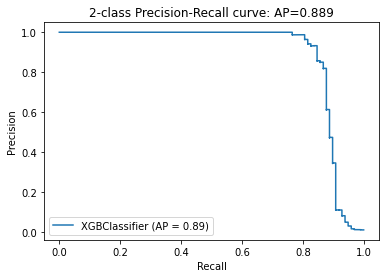

In [50]:
xgb_smo_disp = plot_precision_recall_curve(xgb_clf, X_test, y_test)
xgb_smo_disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.3f}'.format(average_precision_score(y_test, y_pred[:,1])))

XGboost+SMOTE :

Avg Precision is 0.889

In [27]:
xgb_weight_params = {
    'max_depth': 100,
    'learning_rate': 0.03,
    'n_estimators': 1000,
    'subsample': .75,
    'colsample_bytree': 0.7,
    'objective': 'binary:logistic',
    'silent': True,
    'nthread': -1,
    'gamma': 1,
    'min_child_weight': 1,
    'max_delta_step': 0,
    'subsample': 0.85,
    'colsample_bytree': 0.7,
    'colsample_bylevel': 1,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'missing': None,
    'seed': 1
}

Weight: 1 AP=0.894
Weight: 5 AP=0.893
Weight: 10 AP=0.897
Weight: 20 AP=0.895
Weight: 50 AP=0.895
Weight: 100 AP=0.897
Weight: 10000 AP=0.892


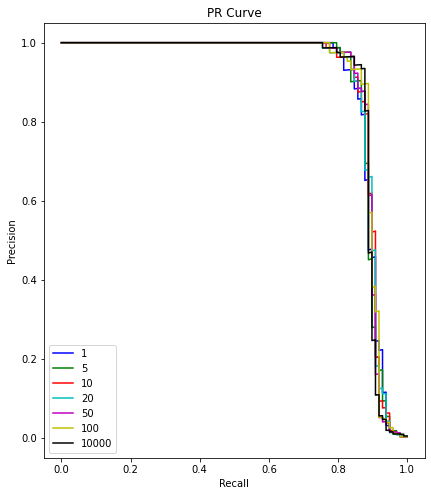

In [61]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,2,1)
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('PR Curve')

for w,k in zip([1,5,10,20,50,100,10000],'bgrcmykw'):
    xgb_clf=xgb.XGBClassifier(scale_pos_weight=w,**xgb_weight_params)
    xgb_clf.fit(X_train,y_train)
    pred_prob = xgb_clf.predict_proba(X_test)[:,1]
    print('Weight:',w,'AP={0:0.3f}'.format(average_precision_score(y_test, pred_prob)))

    p,r,_ = precision_recall_curve(y_test,pred_prob)
    
    ax.plot(r,p,c=k,label=w)
ax.legend(loc='lower left')

plt.show()

XGboost + Scale_pos_weight :

The best AP is 0.897 when weight=10 or 100

# *Feature Importance Selection*






1. Feature Score 

Text(0, 0.5, 'features')

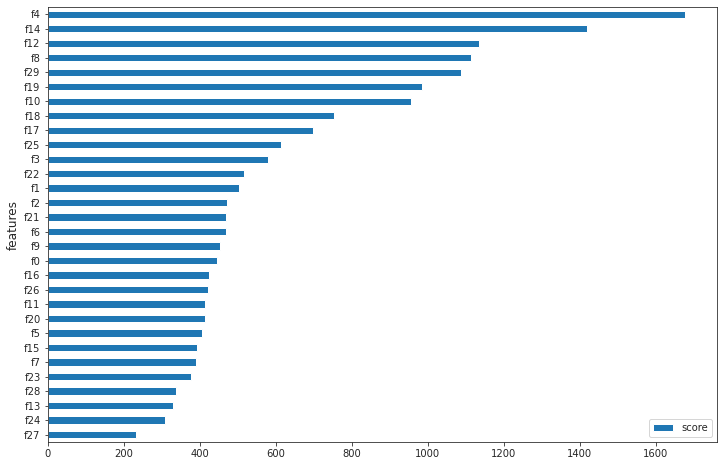

In [86]:
feature_important = xgb_clf.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.plot(kind='barh',figsize=(12,8))
plt.ylabel('features',fontsize = 12)

2. Distribution of class among each feature

In [81]:
def class_distribution(column) : 
    figsize =( 15, 8)
    sns.set_style("ticks")
    s = sns.FacetGrid(df_raw, hue = 'Class',aspect = 2.5, palette ={0 : 'navy', 1 :'black'})
    s.map(sns.kdeplot, column, shade = True, alpha = 0.5)
    s.set(xlim=(df_raw[column].min(), df_raw[column].max()))
    s.add_legend()
    s.set_axis_labels(column, 'proportion')
    s.fig.suptitle(column)
    plt.show()

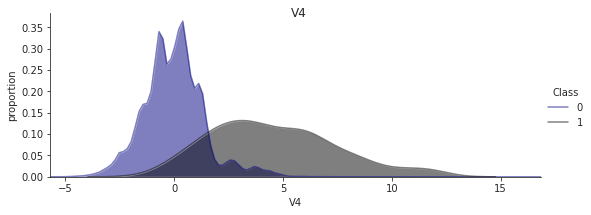

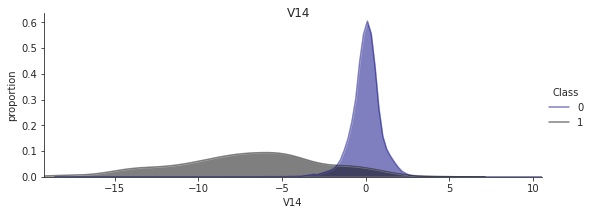

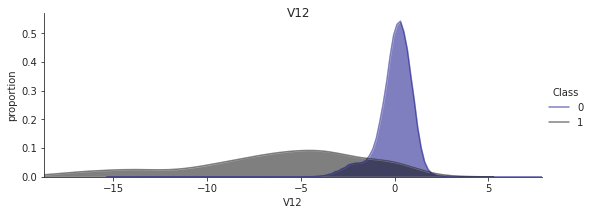

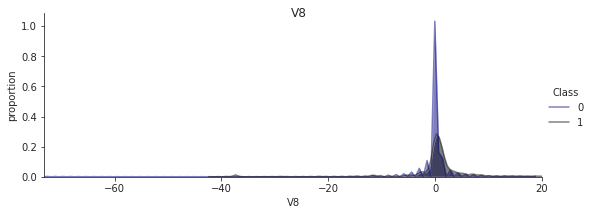

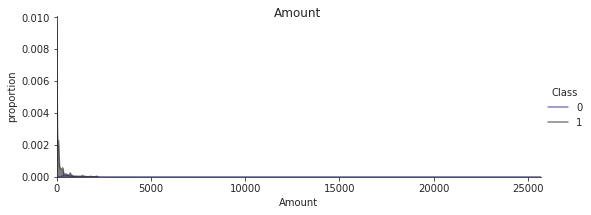

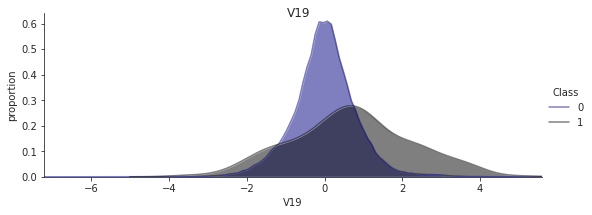

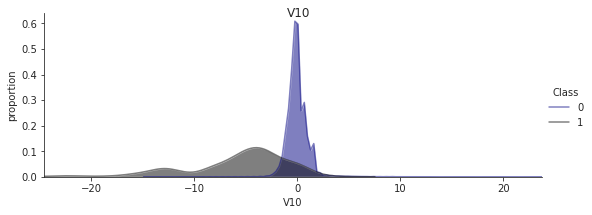

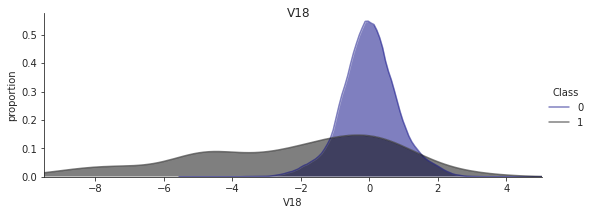

In [88]:
class_distribution('V4')
class_distribution('V14')
class_distribution('V12')
class_distribution('V8')
class_distribution('Amount')
class_distribution('V19')
class_distribution('V10')
class_distribution('V18')

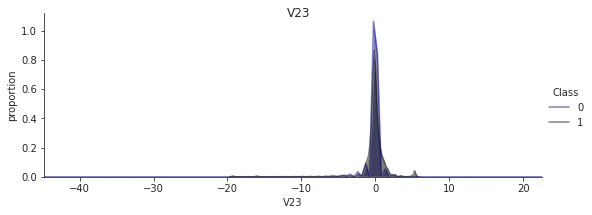

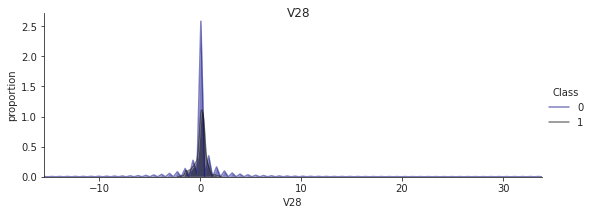

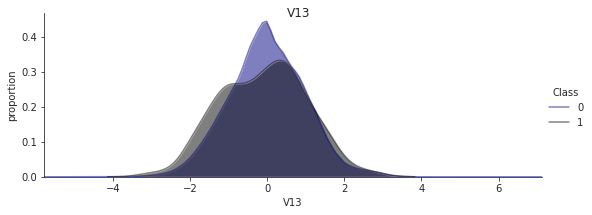

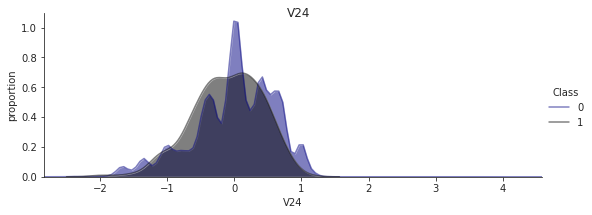

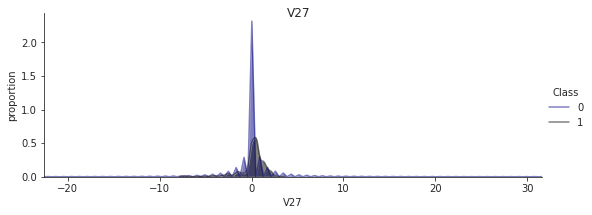

In [89]:
#Bottom 5
class_distribution('V23')
class_distribution('V28')
class_distribution('V13')
class_distribution('V24')
class_distribution('V27')

3. Unselected the Bottom 5 columns

In [22]:
unselected_col=['V23','V28','V13','V24','V27']
X_selected=X[[i for i in list(X.columns) if i not in unselected_col]]
y_selected=y.copy()

In [23]:
scaler=RobustScaler()
X_selected_scaler=scaler.fit_transform(X_selected)

In [24]:
X_selected_train, X_selected_test, y_selected_train, y_selected_test = train_test_split(X_selected_scaler, y_selected, test_size=0.2, random_state=42)

4. Xgboost + Scale_pos_weight=100 +Feature Selection

In [25]:
param_dict={'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 6,
 'missing': None,
 'n_estimators': 1000,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'subsample': 1,
 'eval_metric':'aucpr',
 'silent': True
 }


Weight: 100 AP=0.898


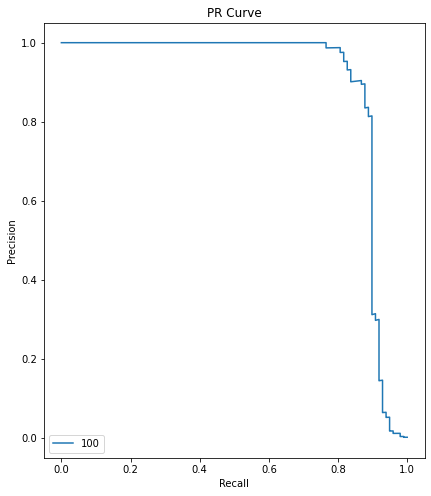

In [44]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,2,1)
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('PR Curve')


xgb_clf=xgb.XGBClassifier(scale_pos_weight=100,**param_dict)
xgb_clf.fit(X_selected_train,y_selected_train)
select_pred_prob = xgb_clf.predict_proba(X_selected_test)[:,1]
print('Weight:',100,'AP={0:0.3f}'.format(average_precision_score(y_selected_test, select_pred_prob)))

p,r,_ = precision_recall_curve(y_selected_test,select_pred_prob)

ax.plot(r,p,label=100)
ax.legend(loc='lower left')

plt.show()

Xgboost + Feature Selection:

Avg Precision is 0.898

5. Xgboost + Scale_pos_weight(=100) +Feature Selection + Cross Validation

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [46]:
kflods = StratifiedKFold(n_splits=10, random_state=42)
print(kflods)
cross_results = cross_val_score(xgb_clf, X_selected_train, y_selected_train, cv=kflods)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


StratifiedKFold(n_splits=10, random_state=42, shuffle=False)


In [51]:

print('Avg Accuracy', np.mean(cross_results),'Max Accuracy',np.max(cross_results))

Avg Accuracy 0.9995479399285087 Accuracy 0.9997366573033708


In [ ]:
recall = cross_val_score(xgb_clf, X_selected_train, y_selected_train, cv=kflods,scoring='recall')
precision = cross_val_score(xgb_clf, X_selected_train, y_selected_train, cv=kflods, scoring='precision')

In [54]:
print('Avg Recall', np.mean(recall),'Max Recall',np.max(recall))
print('Avg Precision', np.mean(precision),'Max Precision' ,np.max(precision))

Avg Recall 0.8126923076923077 Max Recall 0.9230769230769231
Avg Precision 0.920168907169899 Max Precision 1.0


Xgboost + Scale_pos_weight(=100) +Feature Selection + Cross Validation :

**Avg Precision is 0.92**

**Avg Recall is 0.81**

6. Xgboost + SMOTE +Feature Selection 

In [26]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=42)
X_smo_select_train, y_smo_select_train = smo.fit_sample(X_selected_train, y_selected_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [61]:
xgb_clf=xgb.XGBClassifier(**param_dict)
xgb_clf.fit(X_smo_select_train,y_smo_select_train,
              verbose=1, 
              eval_set=[(X_selected_test, y_selected_test)],
              early_stopping_rounds=150)
y_selected_pred=xgb_clf.predict_proba(X_selected_test)

[0]	validation_0-aucpr:0.506665
Will train until validation_0-aucpr hasn't improved in 150 rounds.
[1]	validation_0-aucpr:0.508767
[2]	validation_0-aucpr:0.521346
[3]	validation_0-aucpr:0.546374
[4]	validation_0-aucpr:0.545321
[5]	validation_0-aucpr:0.554463
[6]	validation_0-aucpr:0.700033
[7]	validation_0-aucpr:0.709433
[8]	validation_0-aucpr:0.713631
[9]	validation_0-aucpr:0.733779
[10]	validation_0-aucpr:0.735173
[11]	validation_0-aucpr:0.746108
[12]	validation_0-aucpr:0.747808
[13]	validation_0-aucpr:0.744944
[14]	validation_0-aucpr:0.748352
[15]	validation_0-aucpr:0.749628
[16]	validation_0-aucpr:0.744254
[17]	validation_0-aucpr:0.744454
[18]	validation_0-aucpr:0.746177
[19]	validation_0-aucpr:0.747072
[20]	validation_0-aucpr:0.747295
[21]	validation_0-aucpr:0.74799
[22]	validation_0-aucpr:0.749723
[23]	validation_0-aucpr:0.75113
[24]	validation_0-aucpr:0.753393
[25]	validation_0-aucpr:0.753889
[26]	validation_0-aucpr:0.755702
[27]	validation_0-aucpr:0.758283
[28]	validation_0-auc

In [62]:
average_precision_score(y_selected_test, y_selected_pred[:,1])

0.8835270199627345

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.884')

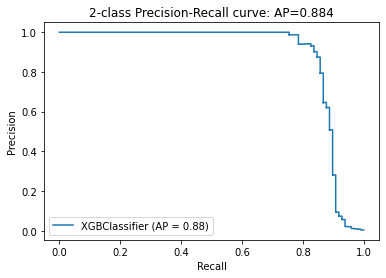

In [63]:
xgb_smo_select_disp = plot_precision_recall_curve(xgb_clf, X_selected_test, y_selected_test)
xgb_smo_select_disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.3f}'.format(average_precision_score(y_selected_test, y_selected_pred[:,1])))

Xgboost + SMOTE +Feature Selection:

Avg Precision is 0.88

In [30]:
xgb_clf=xgb.XGBClassifier(**param_dict)
xgb_clf.fit(X_smo_select_train,y_smo_select_train,
              verbose=1, 
              eval_set=[(X_selected_test, y_selected_test)],
              early_stopping_rounds=150)

[0]	validation_0-aucpr:0.506665
Will train until validation_0-aucpr hasn't improved in 150 rounds.
[1]	validation_0-aucpr:0.508767
[2]	validation_0-aucpr:0.521346
[3]	validation_0-aucpr:0.546374
[4]	validation_0-aucpr:0.545321
[5]	validation_0-aucpr:0.554463
[6]	validation_0-aucpr:0.700033
[7]	validation_0-aucpr:0.709433
[8]	validation_0-aucpr:0.713631
[9]	validation_0-aucpr:0.733779
[10]	validation_0-aucpr:0.735173
[11]	validation_0-aucpr:0.746108
[12]	validation_0-aucpr:0.747808
[13]	validation_0-aucpr:0.744944
[14]	validation_0-aucpr:0.748352
[15]	validation_0-aucpr:0.749628
[16]	validation_0-aucpr:0.744254
[17]	validation_0-aucpr:0.744454
[18]	validation_0-aucpr:0.746177
[19]	validation_0-aucpr:0.747072
[20]	validation_0-aucpr:0.747295
[21]	validation_0-aucpr:0.74799
[22]	validation_0-aucpr:0.749723
[23]	validation_0-aucpr:0.75113
[24]	validation_0-aucpr:0.753393
[25]	validation_0-aucpr:0.753889
[26]	validation_0-aucpr:0.755702
[27]	validation_0-aucpr:0.758283
[28]	validation_0-auc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='aucpr',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=6, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

In [32]:
kflods = StratifiedKFold(n_splits=10, random_state=42)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [33]:
cross_results = cross_val_score(xgb_clf, X_smo_select_train, y_smo_select_train, cv=kflods)

In [39]:
recall = cross_val_score(xgb_clf, X_selected_test, y_selected_test, cv=kflods,scoring='recall')
precision = cross_val_score(xgb_clf, X_selected_test, y_selected_test, cv=kflods, scoring='precision')
print('Avg Recall', np.mean(recall),'Max Recall',np.max(recall))
print('Avg Precision', np.mean(precision),'Max Precision' ,np.max(precision))

Avg Recall 0.7666666666666666 Max Recall 1.0
Avg Precision 0.9267063492063492 Max Precision 1.0


Xgboost + SMOTE +Feature Selection + Cross Validation :

**Avg Precision is 0.93**

**Avg Recall is 0.77**